# Task S4 T01
## Graphical visualization of data

#### - Exercise 1

Download the attached dataset rent price by quarter and neighborhood.csv extracted from the OpenDataBCN website and summarize it statistically and graphically.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_main = pd.read_csv('preu lloguer per trimestre i barri.csv')
df_main.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
5,2021,1,2,Eixample,6,la Sagrada Família,Lloguer mitjà mensual (Euros/mes),887.1
6,2021,1,2,Eixample,7,la Dreta de l'Eixample,Lloguer mitjà mensual (Euros/mes),1176.7
7,2021,1,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),1040.2
8,2021,1,2,Eixample,9,la Nova Esquerra de l'Eixample,Lloguer mitjà mensual (Euros/mes),964.0
9,2021,1,2,Eixample,10,Sant Antoni,Lloguer mitjà mensual (Euros/mes),898.7


In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


We need the Price to be float. First we clean the data they contain: '--'

In [5]:
for x in df_main.index:
    if (df_main.loc[x, "Preu"] == "--"):
        df_main.drop(x, inplace=True)

We change the data types to the correct types, Price to float type and the rest to string type.

In [6]:
df_main['Preu']= df_main['Preu'].astype('float')
df_main['Nom_Districte'] = df_main['Nom_Districte'].astype('string')
df_main['Nom_Barri'] = df_main['Nom_Barri'].astype('string')
df_main['Lloguer_mitja'] = df_main['Lloguer_mitja'].astype('string')

In [7]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    string 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    string 
 6   Lloguer_mitja   540 non-null    string 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), string(3)
memory usage: 54.1 KB


We filter by Price Euros/month and Euros/m2 month.

In [8]:
df_rent_E_m = pd.DataFrame(data=df_main, columns=["Codi_Districte","Any","Trimestre","Nom_Districte","Lloguer_mitja","Preu"])
df_rent_E_m = df_rent_E_m[df_rent_E_m["Lloguer_mitja"]=="Lloguer mitjà mensual (Euros/mes)"]

In [9]:
df_rent_E_m_m = pd.DataFrame(data=df_main, columns=["Codi_Districte","Any","Trimestre","Nom_Districte","Lloguer_mitja","Preu"])
df_rent_E_m_m = df_rent_E_m_m[df_rent_E_m_m["Lloguer_mitja"]=="Lloguer mitjà per superfície (Euros/m2 mes)"]

Create at least one view for:

- A categorical variable (District or Neighborhood)

Neighborhoods - Price

In [10]:
df_neighborhood_price_euros_month = pd.DataFrame(data=df_main, columns=["Codi_Districte","Nom_Districte","Codi_Barri","Nom_Barri","Lloguer_mitja","Preu"])
df_neighborhood_price_euros_month = df_neighborhood_price_euros_month[df_neighborhood_price_euros_month["Lloguer_mitja"]=="Lloguer mitjà mensual (Euros/mes)"]

df_neighborhood_price_euros_month= pd.DataFrame(df_neighborhood_price_euros_month.groupby("Nom_Barri")["Preu"].mean())
df_neighborhood_price_euros_month.reset_index(drop=False, inplace=True)

x = df_neighborhood_price_euros_month["Nom_Barri"]
y = df_neighborhood_price_euros_month["Preu"]

df_neighborhood_price_euros_month.head(10)

,Nom_Barri,Preu
0,Baró de Viver,532.100
1,Can Baró,756.500
2,Canyelles,742.375
3,Ciutat Meridiana,525.700
4,Diagonal Mar i el Front Marítim del Poblenou,1073.725
5,Horta,749.400
6,Hostafrancs,791.325
7,Montbau,740.350
8,Navas,820.525
9,Pedralbes,1693.575


As we see that the table is wide enough to graph, we will only graph the 5 neighborhoods with the highest prices and the 5 neighborhoods with the lowest prices.

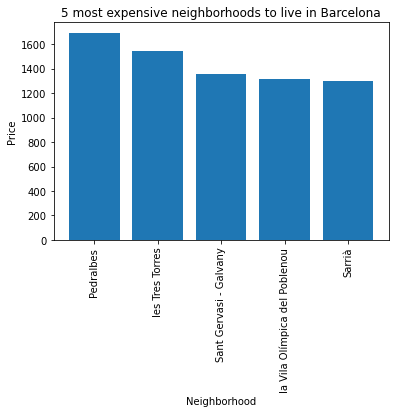

In [11]:
order_high_price = df_neighborhood_price_euros_month.sort_values('Preu', ascending=False)
top_5_high = order_high_price.head(5)
plt.bar(top_5_high['Nom_Barri'], top_5_high['Preu'])
plt.title('5 most expensive neighborhoods to live in Barcelona')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

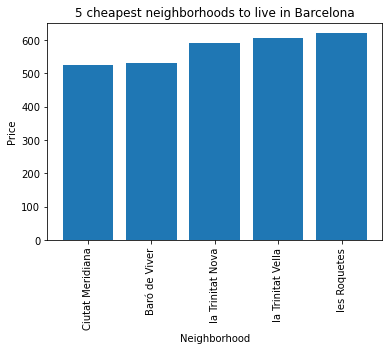

In [12]:
order_low_price = df_neighborhood_price_euros_month.sort_values('Preu', ascending=True)
top_5_low = order_low_price.head(5)
plt.bar(top_5_low['Nom_Barri'], top_5_low['Preu'])
plt.title('5 cheapest neighborhoods to live in Barcelona')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

- A numeric variable (Price)


In [46]:
df_neighborhood_price_euros = pd.DataFrame(data=df_main, columns=["Codi_Barri","Nom_Barri","Lloguer_mitja","Preu"])
df_neighborhood_price_euros = df_neighborhood_price_euros[df_neighborhood_price_euros["Lloguer_mitja"]=="Lloguer mitjà per superfície (Euros/m2 mes)"]
df_neighborhood_price_euros.head(10)

,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
73,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),12.8
74,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3
75,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),15.5
76,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),13.3
77,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.9
78,6,la Sagrada Família,Lloguer mitjà per superfície (Euros/m2 mes),13.5
79,7,la Dreta de l'Eixample,Lloguer mitjà per superfície (Euros/m2 mes),13.0
80,8,l'Antiga Esquerra de l'Eixample,Lloguer mitjà per superfície (Euros/m2 mes),13.7
81,9,la Nova Esquerra de l'Eixample,Lloguer mitjà per superfície (Euros/m2 mes),13.6
82,10,Sant Antoni,Lloguer mitjà per superfície (Euros/m2 mes),12.5


- A numerical variable and a categorical one (District and Price)

Rent price Euros per month per meter 2

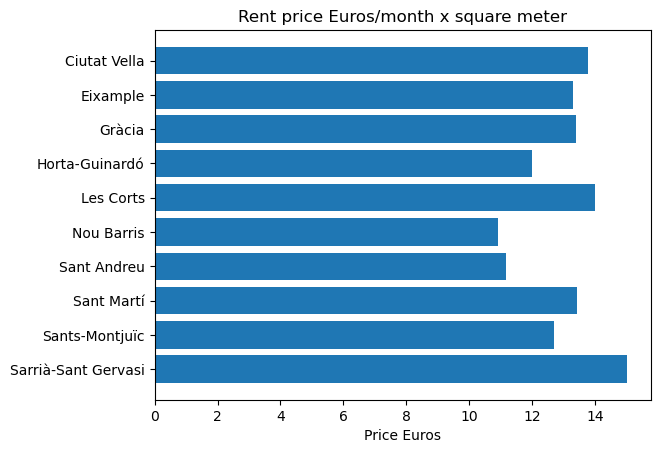

In [148]:
##Rent price Euros/month x square meter
df_rent_E_m_m= pd.DataFrame(df_rent_E_m_m.groupby("Nom_Districte")["Preu"].mean())
df_rent_E_m_m.reset_index(drop=False, inplace=True)

plt.rcdefaults()
fig, ax = plt.subplots()

Discrict = df_rent_E_m_m["Nom_Districte"]
y_pos = np.arange(len(Discrict))
Price = df_rent_E_m_m["Preu"]

ax.barh(y_pos, Price, align='center')
ax.set_yticks(y_pos, labels=Discrict)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price Euros')
ax.set_title('Rent price Euros/month x square meter')

plt.show()

Rent price Euros/month

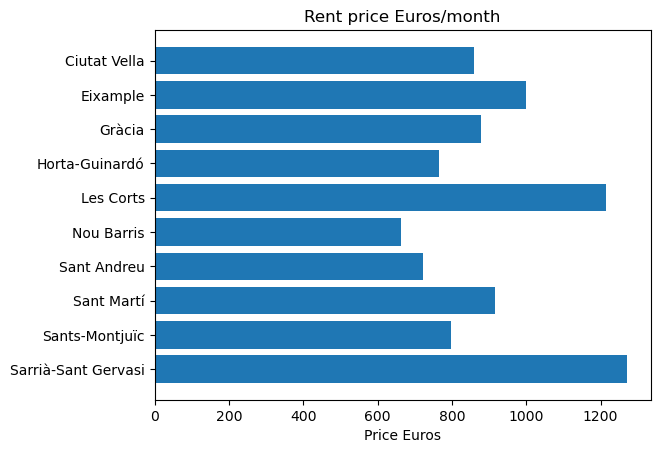

In [81]:
#Rent price Euros/month
df_rent_E_m = pd.DataFrame(df_rent_E_m.groupby("Nom_Districte")["Preu"].mean())
df_rent_E_m.reset_index(drop=False, inplace=True)

fig, ax = plt.subplots()

Discrict = df_rent_E_m["Nom_Districte"]
y_pos = np.arange(len(Discrict))
Price = df_rent_E_m["Preu"]

ax.barh(y_pos, Price, align='center')
ax.set_yticks(y_pos, labels=Discrict)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Price Euros')
ax.set_title('Rent price Euros/month')

plt.show()

- Two numeric variables (Year or Quarter and Price)

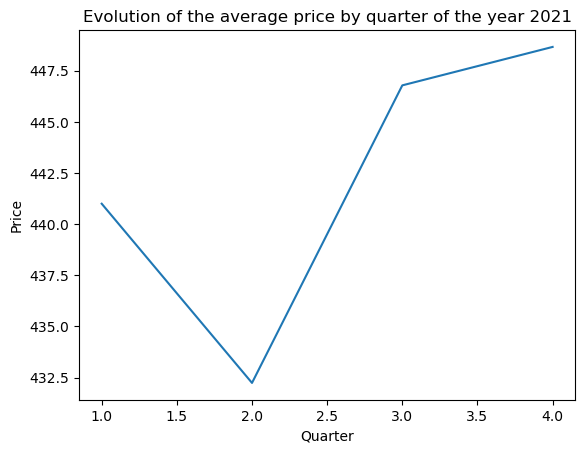

In [150]:
import seaborn as sns
df_quarter = df_main.groupby('Trimestre', as_index=False)['Preu'].mean()
sns.lineplot(x='Trimestre',y='Preu', data=df_quarter)
plt.title('Evolution of the average price by quarter of the year 2021')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.show()

- Three variables (Neighbourhood or District, Quarter and Price)

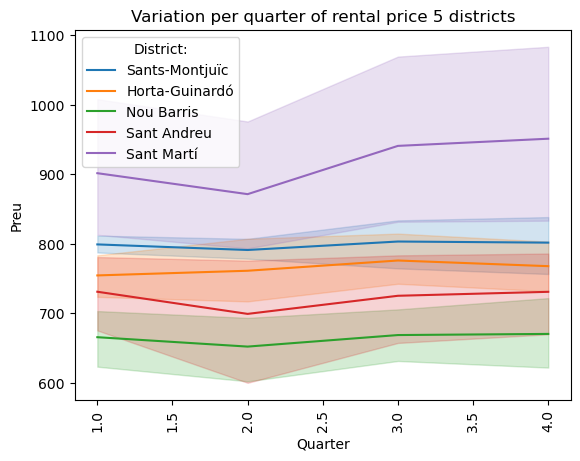

In [152]:
df_top_5_low_Dis = pd.DataFrame(data=df_main, columns=["Any","Trimestre","Codi_Districte","Nom_Districte","Lloguer_mitja","Preu"])
df_top_5_low_Dis = df_top_5_low_Dis[df_top_5_low_Dis["Lloguer_mitja"]=="Lloguer mitjà mensual (Euros/mes)"]
df_top_5_low_Dis = df_top_5_low_Dis[df_top_5_low_Dis["Nom_Districte"].isin(['Nou Barris', 'Sant Andreu', 'Sants-Montjuïc', 'Horta-Guinardó', 'Sant Martí'])]

df_top_5_low_Dis.head(10)
sns.lineplot(x='Trimestre',y='Preu', hue='Nom_Districte', data=df_top_5_low_Dis)

plt.title('Variation per quarter of rental price 5 districts')
plt.xlabel('Quarter')
plt.xticks(rotation=90)
plt.savefig('Graph_Rent_Price_Quarter_District.jpg')
plt.legend(title='District:')
plt.show()

#### - Exercise 2

Export graphics as images or as HTML.

Arriba se agrega una linea donde se guarda la imagen que debe estar antes de mostrarla.

In [120]:
plt.savefig('Graph_Rent_Price_Quarter_District.png', transparent=True)

<Figure size 640x480 with 0 Axes>

Cabe aclarar que los formatos en los que se puede guardar son: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff y no asi como html.

#### - Exercise 3
Suggest a visualization that you think might be interesting. 

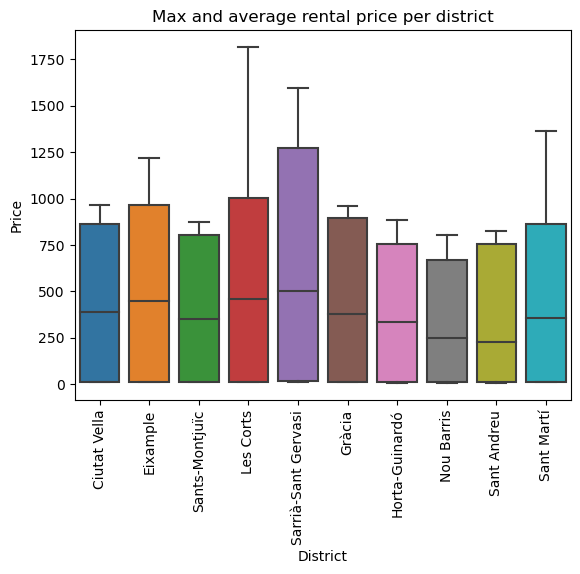

In [153]:
sns.boxplot(x='Nom_Districte', y='Preu', data=df_main)
plt.title('Max and average rental price per district')
plt.xlabel('District')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()